In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/real-or-fake-fake-jobposting-prediction")

print("Path to dataset files:", path)

100%|██████████| 16.1M/16.1M [00:00<00:00, 91.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shivamb/real-or-fake-fake-jobposting-prediction/versions/1


# Task
Detect fraudulent job listings using the "Fake Jobs" dataset, TF-IDF for text vectorization, and an XGBoost model for classification.

## Load the dataset

### Subtask:
Load the dataset from the specified path into a pandas DataFrame.


**Reasoning**:
Import pandas, construct the file path, read the CSV into a DataFrame, and display the head and info of the DataFrame.



In [3]:
import pandas as pd
import os

file_path = os.path.join(path, 'fake_job_postings.csv')
df = pd.read_csv(file_path)

display(df.head())
display(df.info())

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

None

## Explore and preprocess the data

### Subtask:
Handle missing values, perform necessary text cleaning, and prepare the data for TF-IDF vectorization.


**Reasoning**:
Handle missing values in text columns by replacing them with empty strings, concatenate the text columns, and perform basic text cleaning. Then display the missing value counts to verify the handling of text columns.



In [4]:
text_cols = ['title', 'location', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']
for col in text_cols:
    df[col] = df[col].fillna('')

df['text_column'] = df[text_cols].agg(' '.join, axis=1)

df['text_column'] = df['text_column'].str.lower()
df['text_column'] = df['text_column'].str.replace('[^\w\s]', '', regex=True)

print("Missing values after handling text columns:")
display(df.isnull().sum())

Missing values after handling text columns:


,0
job_id,0
title,0
location,0
department,0
salary_range,15012
company_profile,0
description,0
requirements,0
benefits,0
telecommuting,0


## Apply tf-idf

### Subtask:
Convert the text data into numerical features using TF-IDF.


**Reasoning**:
Import the necessary class and instantiate the TF-IDF vectorizer, then fit and transform the text data.



In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_column'])

print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (17880, 166972)


## Train the xgboost model

### Subtask:
Train an XGBoost classifier on the TF-IDF features.


**Reasoning**:
Train an XGBoost classifier on the TF-IDF features.



In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X = tfidf_matrix
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

## Evaluate the model

### Subtask:
Evaluate the performance of the trained model using appropriate metrics.


**Reasoning**:
Import the necessary evaluation metrics and calculate the accuracy, precision, recall, and F1-score of the trained model on the test set.



In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9818
Precision: 0.9462
Recall: 0.6796
F1-score: 0.7910


## Summary:

### Data Analysis Key Findings

* The dataset contains 17880 job postings with 18 columns, including text fields, categorical features, and a target variable indicating fraudulent listings.
* Missing values in the specified text columns were successfully handled by replacing them with empty strings.
* A new combined text column was created and preprocessed by converting to lowercase and removing punctuation.
* TF-IDF vectorization transformed the text data into a numerical matrix with 17880 documents and 166972 features.
* An XGBoost classifier was trained on the TF-IDF features.
* The trained XGBoost model achieved an accuracy of 0.9818, a precision of 0.9462, a recall of 0.6796, and an F1-score of 0.7910 on the test set.

### Insights or Next Steps

* While the model has high precision, the recall is lower, suggesting it misses a significant portion of fraudulent listings. Future steps could involve techniques to improve recall, such as exploring different models, adjusting model hyperparameters, or using resampling techniques to address potential class imbalance.
* Further feature engineering, potentially including numerical or categorical features from the original dataset alongside the TF-IDF features, could enhance model performance.


# Task
Detect fraudulent job listings using the "Fake Jobs" dataset, TF-IDF for text vectorization, and an XGBoost model, including visualizations of the results.

## Visualize results

### Subtask:
Create visualizations to represent the data or model performance.


**Reasoning**:
Create visualizations for model performance (confusion matrix) and data distribution (target variable).



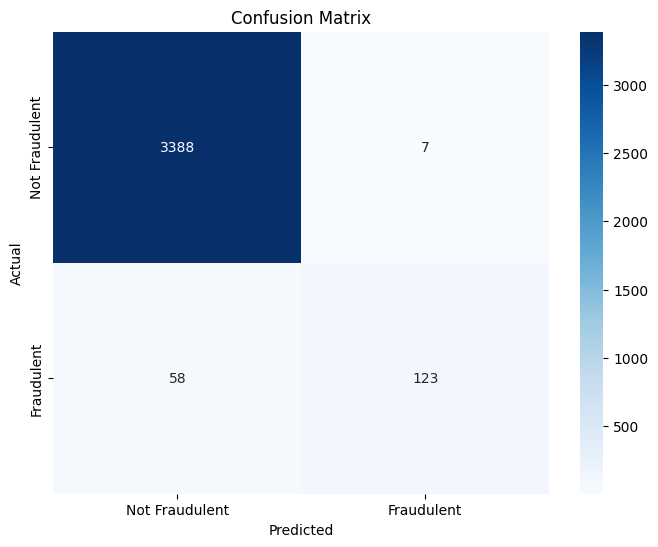

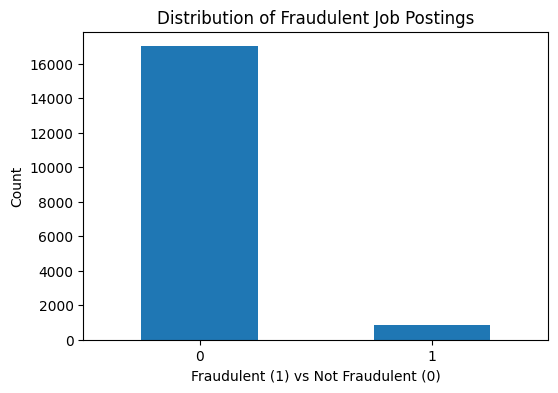

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraudulent', 'Fraudulent'], yticklabels=['Not Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Distribution of target variable
plt.figure(figsize=(6, 4))
df['fraudulent'].value_counts().plot(kind='bar')
plt.xlabel('Fraudulent (1) vs Not Fraudulent (0)')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent Job Postings')
plt.xticks(rotation=0)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset shows a significant imbalance, with a much higher number of non-fraudulent job postings compared to fraudulent ones, as indicated by the bar plot of the target variable distribution.
*   The confusion matrix visualization provides a breakdown of the model's performance, showing the counts of correctly and incorrectly classified instances for both fraudulent and non-fraudulent job postings.

### Insights or Next Steps

*   The class imbalance observed in the data suggests that techniques to handle imbalanced datasets, such as oversampling the minority class or undersampling the majority class, could be explored to potentially improve model performance.
*   Analyzing the specific values in the confusion matrix (e.g., false positives and false negatives) can provide insights into the types of errors the model is making and guide further model tuning or feature engineering efforts.
